# Task03 NetworkX工具包实战

## 1 导入工具包

In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd

# 数据可视化
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 2 创建图

### 2.1 使用API快速创建图

- 经典图结构：
    - 全连接图：complete_graph(7)
    - 环状图：cycle_graph(5)
    - 梯状图：ladder_graph(5)
    - 线性串珠图：path_graph(15)
    - 星状图：star_graph(7)
    - 轮辐图：wheel_graph(8)
    - 二项树：binomial_tree(5)

- 栅格图：
    - 二维矩形网格图：grid_2d_graph(3, 5)
    - 多维矩形网格图：grid_graph(dim=(2, 3, 4))
    - 二维三角形网格图：triangular_lattice_graph(2, 5)
    - 二维六边形蜂窝图：hexagonal_lattice_graph(2, 3)
    - n维超立方体图：hypercube_graph(4)

- NetworkX内置图：
    - diamond_graph()
    - bull_graph()
    - frucht_graph()
    - house_graph()
    - house_x_graph()
    - petersen_graph()
    - krackhardt_kite_graph()

- 随机图：erdos_renyi_graph(10, 0.5)
- 无标度有向图：scale_free_graph(100)
- 社交网络：nx.karate_club_graph()
- 社群聚类图：caveman_graph(4, 3)
- 树：nx.random_tree(n=10, seed=0)、nx.forest_str(tree, sources=[0])

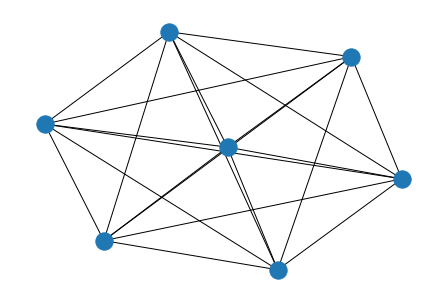

In [2]:
# 全连接无向图
G = nx.complete_graph(7)
nx.draw(G)

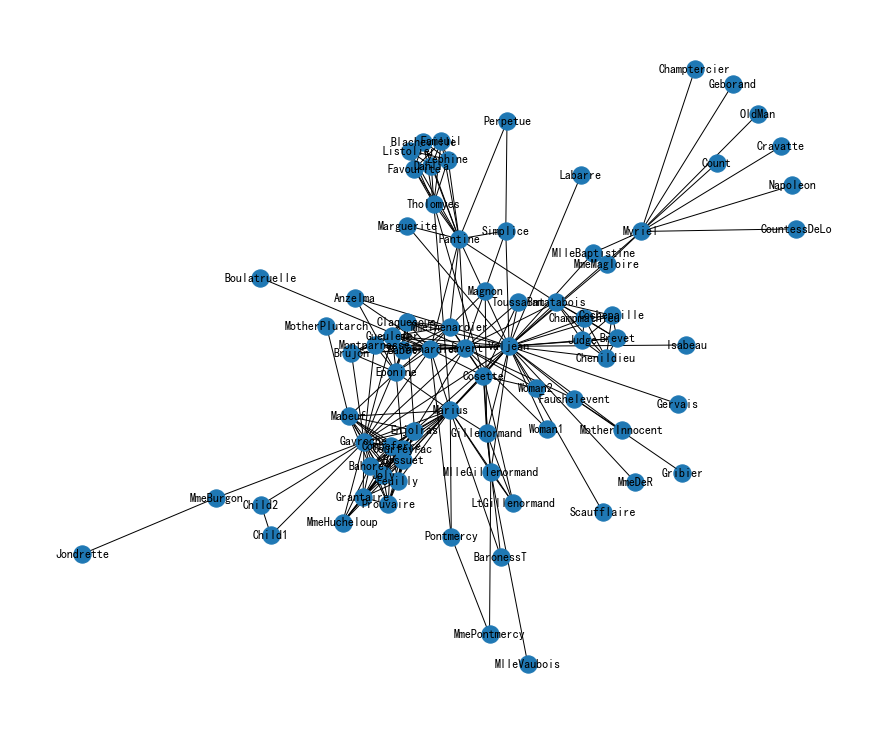

In [3]:
# 雨果《悲惨世界》人物关系
G = nx.les_miserables_graph()
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, with_labels=True)

In [4]:
# 树
tree = nx.random_tree(n=10, seed=0)
print(nx.forest_str(tree, sources=[0]))

╙── 0
    ├── 3
    └── 4
        ├── 6
        │   ├── 1
        │   ├── 2
        │   └── 7
        │       └── 8
        │           └── 5
        └── 9


### 2.2 使用连接表和邻接表创建图

In [5]:
# 导入 csv 文件定义的三元组连接表，构建有向图
df = pd.read_csv('data/Three_Kingdoms/triples.csv')

In [6]:
# 通过连接表Edge List创建图
G = nx.DiGraph()
edges = [edge for edge in zip(df['head'], df['tail'])]
G.add_edges_from(edges)

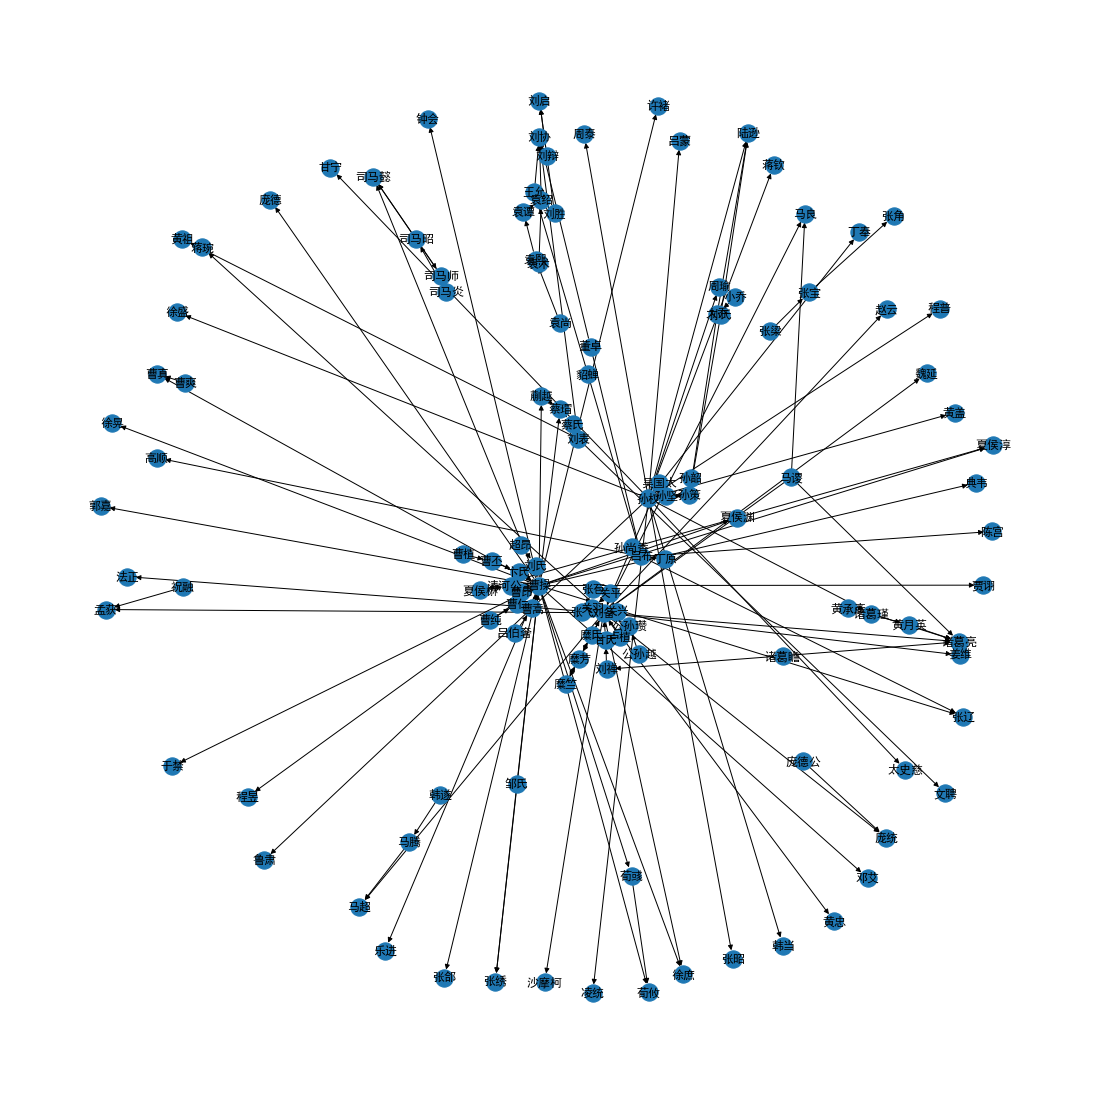

In [7]:
# 节点排版布局-默认弹簧布局
pos = nx.spring_layout(G, seed=123)

plt.figure(figsize=(15,15))
# 可视化展示
nx.draw(G, pos=pos, with_labels=True)

In [8]:
# 将邻接表导出为本地文件 grid.edgelist
nx.write_edgelist(G, path="data/Three_Kingdoms/grid.edgelist", delimiter=":")

In [9]:
# 从本地文件 grid.edgelist 读取邻接表
H = nx.read_edgelist(path="data/Three_Kingdoms/grid.edgelist", delimiter=":")

### 2.3 创建节点

In [10]:
G = nx.Graph()
G.add_node('刘备')
G.add_nodes_from(['诸葛亮', '曹操'])
G.add_nodes_from([
    ('关羽',{'武器': '青龙偃月刀','武力值':90,'智力值':80}),
    ('张飞',{'武器': '丈八蛇矛','武力值':85,'智力值':75}),
    ('吕布',{'武器':'方天画戟','武力值':100,'智力值':70})
])

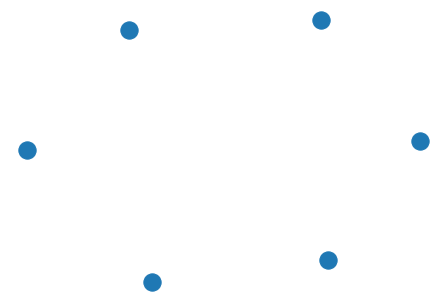

In [11]:
# 可视化
nx.draw(G)

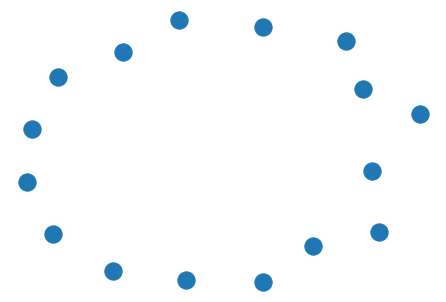

In [12]:
H = nx.path_graph(10)
# 添加H所有的节点到G图中
G.add_nodes_from(H)
nx.draw(G)

### 2.4 创建连接

In [13]:
# 创建0号节点，并添加特征属性
G = nx.Graph()
G.add_node(0, feature=5, label=0, name='Relph')
G.add_nodes_from([
  (1, {'feature': 1, 'label': 1, 'name': 'Tom'}),
  (2, {'feature': 2, 'label': 2, 'name': 'John'})
])

In [14]:
G.number_of_nodes()

3

In [15]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0, 'name': 'Relph'}, 1: {'feature': 1, 'label': 1, 'name': 'Tom'}, 2: {'feature': 2, 'label': 2, 'name': 'John'}})

In [16]:
# 创建连接
G.add_edge(0, 1, weight=0.5, like=3)
G.add_edges_from([
  (1, 2, {'weight': 0.3, 'like':5}),
  (2, 0, {'weight': 0.1, 'like':8})
])

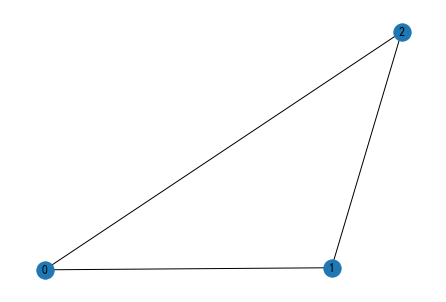

In [17]:
nx.draw(G, with_labels = True)

In [18]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 0.5, 'like': 3}), (0, 2, {'weight': 0.1, 'like': 8}), (1, 2, {'weight': 0.3, 'like': 5})])

In [19]:
# 指定节点
node_id = 1
# 指定节点的所有相邻节点
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has neighbor 0
Node 1 has neighbor 2


## 3 可视化

### 3.1 nx.draw

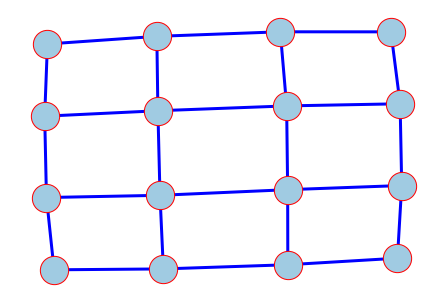

In [20]:
G = nx.grid_2d_graph(4, 4)
pos = nx.spring_layout(G, seed=123)
# 无向图
nx.draw(
    G,
    pos,
    node_color='#A0CBE2',      # 节点颜色
    edgecolors='red',          # 节点外边缘的颜色
    edge_color="blue",         # edge的颜色
    # edge_cmap=plt.cm.coolwarm, # 配色方案
    node_size=800,
    with_labels=False,
    width=3,
)

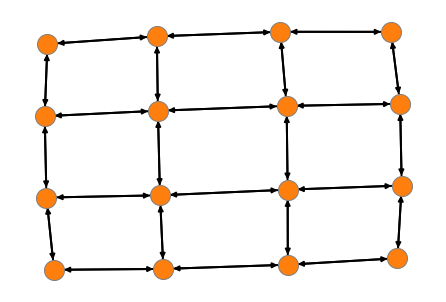

In [21]:
# 有向图
nx.draw(
    G.to_directed(),
    pos,
    node_color="tab:orange",
    node_size=400,
    with_labels=False,
    edgecolors="tab:gray",
    arrowsize=10,
    width=2,
)

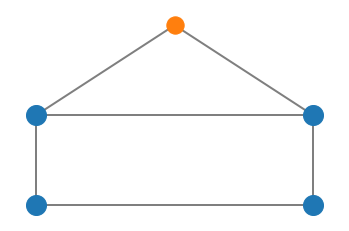

In [22]:
G = nx.house_graph()
# 设置节点坐标
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
plt.figure(figsize=(6, 4))
# 绘制“墙角”的四个节点
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=[0, 1, 2, 3], node_color="tab:blue")
# 绘制“屋顶”节点
nx.draw_networkx_nodes(G, pos, node_size=300, nodelist=[4], node_color="tab:orange")
# 绘制连接
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)
plt.axis("off") # 去掉坐标轴
plt.show()

### 3.2 有向图可视化

In [23]:
seed = 13648
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

In [24]:
# 设置节点大小
node_sizes = [12 + 10 * i for i in range(len(G))]
# 设置节点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)
# 设置节点透明度
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
# 设置配色方案
cmap = plt.cm.plasma

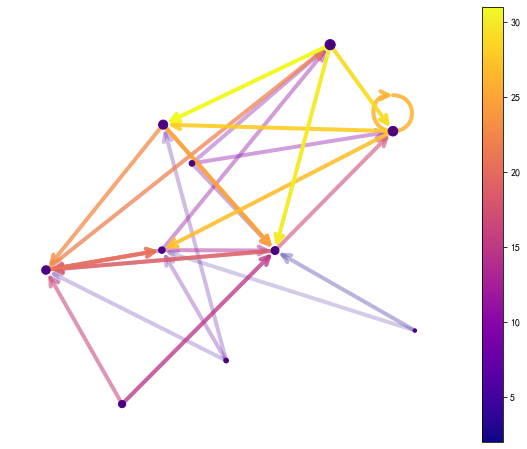

In [25]:
plt.figure(figsize=(10,8))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")

# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,   # 节点尺寸
    arrowstyle="->",        # 箭头样式
    arrowsize=20,           # 箭头尺寸
    edge_color=edge_colors, # 连接颜色
    edge_cmap=cmap,         # 连接配色方案
    width=4                 # 连接线宽
)

# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# 调色图例
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.add_collection(pc)
plt.colorbar(pc)
ax.set_axis_off()
plt.show()

### 3.3 自定义节点图标

In [26]:
import PIL

icons = {
    'router': 'data/icon/database-storage.png',
    'switch': 'data/icon/wifi.png',
    'PC': 'data/icon/laptop.png',
}

# 载入图像
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [27]:
# 创建空图
G = nx.Graph()

# 创建节点
G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

# 创建连接
G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

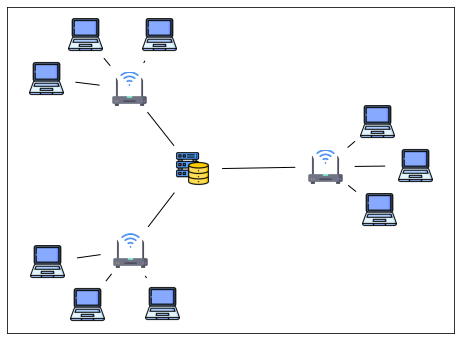

In [28]:
pos = nx.spring_layout(G, seed=1)
fig, ax = plt.subplots(figsize=(8,6))

# 图片尺寸（相对于 X 轴）
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.08
icon_center = icon_size / 2.0
# 绘制连接
# min_source_margin 和 min_target_margin 调节连接端点到节点的距离
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=30,
    min_target_margin=30,
)

# 给每个节点添加各自的图片
for n in G.nodes:
    xf, yf = ax.transData.transform(pos[n]) # data坐标 转 display坐标
    xa, ya = fig.transFigure.inverted().transform((xf, yf)) # display坐标 转 figure坐标
    
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")

plt.show()

### 3.4 自我中心图（Ego图）

In [29]:
from operator import itemgetter

In [30]:
n = 1000
m = 2
seed = 20532
# 创建Barabasi Albert图
G = nx.barabasi_albert_graph(n, m, seed=seed)
pos = nx.spring_layout(G, seed=seed)

In [31]:
# 找到degree最大的主节点
largest_hub, degree = sorted(G.degree(), key=itemgetter(1))[-1]

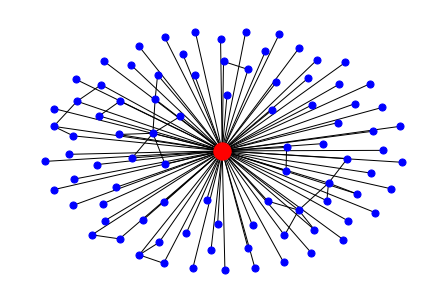

In [32]:
hub_ego = nx.ego_graph(G, largest_hub, radius=1)

pos = nx.spring_layout(hub_ego, seed=seed)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# 大红显示主节点
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)

plt.show()

## 4 实战案例

### 4.1 PageRank节点重要度

In [33]:
G = nx.star_graph(7)
# 计算PageRank节点重要度
pagerank = nx.pagerank(G, alpha=0.8)

pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

### 4.2 节点连接数Node Degree度分析

In [34]:
# 创建binomial graph
# n-节点数
# p-任意两个节点产生连接的概率

G = nx.gnp_random_graph(100, 0.02, seed=10374196)

In [35]:
# 最大连通域子图
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

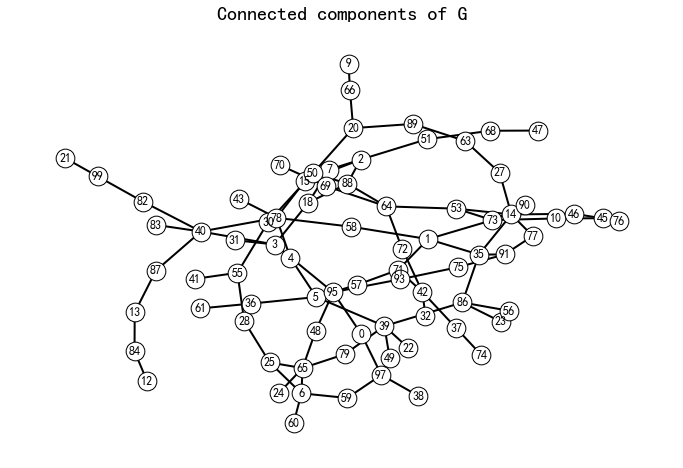

In [36]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(Gcc, seed=10396953)

# 设置其它可视化样式
options = {
    "font_size": 12,
    "node_size": 350,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1, # 节点线宽
    "width": 2, # edge线宽
}

nx.draw_networkx(Gcc, pos, **options)

plt.title('Connected components of G', fontsize=20)
plt.axis('off')
plt.show()

In [37]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

X = np.unique(degree_sequence, return_counts=True)[0]
Y = np.unique(degree_sequence, return_counts=True)[1]

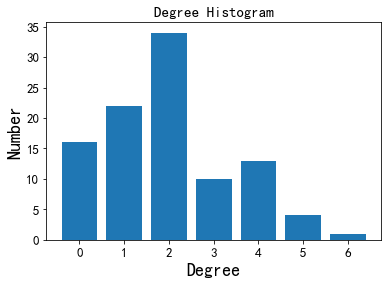

In [38]:
# 绘制Degree Rank
plt.figure(figsize=(6,4))
plt.bar(X, Y)

plt.title('Degree Histogram', fontsize=15)
plt.ylabel('Number', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.tick_params(labelsize=13) # 设置坐标文字大小
plt.show()
plt.show()

### 4.3 特征分析

- 半径：nx.radius(G)
- 直径：nx.diameter(G)
- 偏心度（每个节点到图中其它节点的最远距离）：nx.eccentricity(G)
- 中心节点（偏心度与半径相等的节点）：nx.center(G)
- 外围节点（偏心度与直径相等的节点）：nx.periphery(G)
- 密集度：nx.density(G)

**密集度计算公式：**

n为节点个数，m为连接个数

对于无向图：

$$
density = \frac{2m}{n(n-1)}
$$

对于有向图：

$$
density = \frac{m}{n(n-1)}
$$

无连接图的density为0，全连接图的density为1，Multigraph（多重连接图）和带self loop图的density可能大于1。

- 节点到图中其它节点的最短距离：nx.single_source_shortest_path_length(G, node_id)

### 4.4 计算节点特征

- 节点重要度特征Centrality：
    - 无向图：nx.degree_centrality(G)
    - 有向图：nx.in_degree_centrality(DiG)、nx.out_degree_centrality(DiG)

- 特征向量重要度：
    - 无向图：nx.eigenvector_centrality(G)
    - 有向图：nx.eigenvector_centrality_numpy(DiG)

- Betweenness Centrality（必经之地）：nx.betweenness_centrality(G)

- Closeness Centrality（去哪儿都近）：nx.closeness_centrality(G)

- PageRank：nx.pagerank(DiG, alpha=0.85)
- Katz Centrality：nx.katz_centrality(G, alpha=0.1, beta=1.0)
- Clustering（社群属性）：nx.triangles(G)
- Clustering Coefficient：nx.clustering(G)
- Bridge：nx.bridges(G)
- Common Neighbors：nx.common_neighbors(G, 0, 4)
- Jaccard Coefficient（交并比）：nx.jaccard_coefficient(G, [(0, 1), (2, 3)])

- Katz Index（节点$u$到节点$v$，路径为$k$的路径个数）

In [39]:
import numpy as np
from numpy.linalg import inv

In [40]:
G = nx.karate_club_graph()

# 计算主特征向量
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print('最大特征值', max(e))

# 折减系数
beta = 1/max(e)

# 创建单位矩阵
I = np.identity(len(G.nodes))

# 计算 Katz Index
S = inv(I - nx.to_numpy_array(G)*beta) - I

最大特征值 1.7146113474736282


### 4.5 计算全图Graphlet个数

In [41]:
G = nx.karate_club_graph()

In [42]:
# 指定Graphlet
target = nx.complete_graph(3)

In [43]:
import itertools

def compute_graphlet(G, target):
    num = 0
    # 遍历全图中，符合graphlet节点个数的所有节点组合
    for sub_nodes in itertools.combinations(G.nodes(), len(target.nodes())):  
        # 从全图中抽取出子图
        subg = G.subgraph(sub_nodes)         
        # 如果子图是完整连通域，并且符合graphlet特征，输出原图节点编号
        if nx.is_connected(subg) and nx.is_isomorphic(subg, target):          
            num += 1
            return subg.edges()

### 4.6 拉普拉斯矩阵特征值分解

In [44]:
# 创建图
n = 1000  # 节点个数
m = 5000  # 连接个数
G = nx.gnm_random_graph(n, m, seed=5040)

In [45]:
A = nx.adjacency_matrix(G)

1. 拉普拉斯矩阵（Laplacian Matrix）

$$
L = D - A
$$

- L：拉普拉斯矩阵（Laplacian Matrix）
- D：节点degree对角矩阵
- A：为邻接矩阵（Adjacency Matrix）

In [46]:
L = nx.laplacian_matrix(G)
# 节点degree对角矩阵
D = L + A
D.todense()

matrix([[12,  0,  0, ...,  0,  0,  0],
        [ 0,  6,  0, ...,  0,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  8,  0,  0],
        [ 0,  0,  0, ...,  0,  6,  0],
        [ 0,  0,  0, ...,  0,  0,  7]], dtype=int32)

2. 归一化拉普拉斯矩阵（Normalized Laplacian Matrix）

$$
L_n = D^{-\frac{1}{2}}LD^{-\frac{1}{2}}
$$

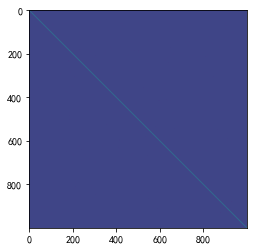

In [47]:
L_n = nx.normalized_laplacian_matrix(G)

plt.imshow(L_n.todense())
plt.show()

In [48]:
# 特征值分解
e = np.linalg.eigvals(L_n.A)

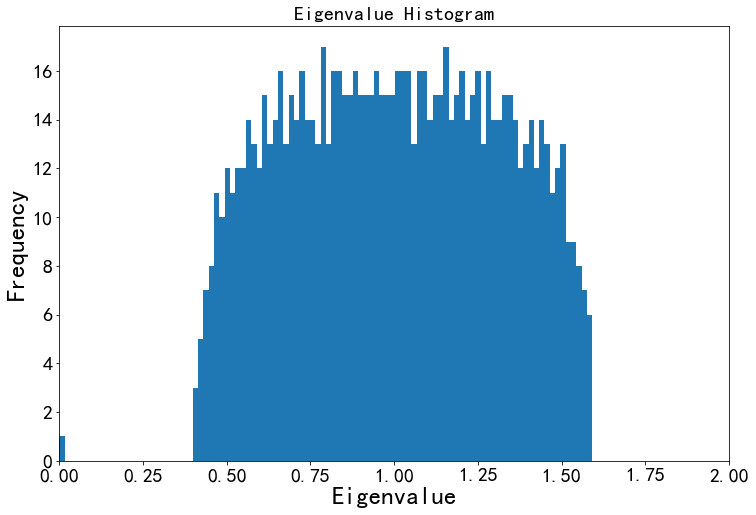

In [49]:
# 特征值分布直方图
plt.figure(figsize=(12,8))

plt.hist(e, bins=100)
plt.xlim(0, 2)  # eigenvalues between 0 and 2

plt.title('Eigenvalue Histogram', fontsize=20)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Eigenvalue', fontsize=25)
plt.tick_params(labelsize=20) # 设置坐标文字大小
plt.show()

## 5 本章总结

本次任务，主要讲解NetworkX工具包的使用，包括：

- 创建图：使用API快速创建图、使用连接表和邻接表创建图、创建节点、创建连接
- 可视化：使用nx.draw()方法、有向图可视化、自定义节点图标、自我中心图（Ego图）
- 实战案例：PageRank节点重要度、节点连接数Node Degree度分析、特征分析、计算节点特征、计算全图Graphlet个数、拉普拉斯矩阵特征值分解